<a href="https://colab.research.google.com/github/NEOEQ/Termodinamica/blob/main/Introdu%C3%A7%C3%A3o%20e%20Conceitos%20B%C3%A1sicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->
<[Conteúdo](tag_index.html) | [1. Primeira Lei da Termodinâmica](https://jckantor.github.io/CBE30338/02.03-Blending-Tank-Simulation.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://github.com/NEOEQ/Termodinamica/blob/main/Introdu%C3%A7%C3%A3o%20e%20Conceitos%20B%C3%A1sicos.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 1. Introdução e Conceitos Básicos

**Exemplo 1**: **Nível de líquido no manômetro de pressão diferencial**

Considere um manômetro, contendo um fluido de massa específica $\rho$, onde a pressão medida é  $P$ e a pressão atmosférica é $P_{atm}$. Sabendo-se que a aceleração da gravidade é $g=9,067 m/s^2$, calcule o nível de líquido no manômetro. Dados: $\rho = 2,95\cdot10^3 kg/m^3$, $P=1,15\cdot10^5 Pa$ e $P_{atm}=1.01325\cdot10^5 Pa$.   

$$dP=\rho gdh$$
$$\int_{P_{atm}}^{P}dP=\rho\ g\int_{h_0}^{h}dh$$
$$\Delta h=h-h_0=(P-P_{atm})/(\rho\cdot{g})$$

onde $h_0$ é zero. 

In [ ]:
# Variáveis
p1 = 1.15*10**5; 			  #pressão medida[N/m**2]
p2 = 1.01325*10**5; 		#pressão atmosférica[N/m**2]
rho = 2.95*10**3; 			#massa específica do fluido
g = 9.8067              #aceleração da gravidade

# Cálculos
# Para encontrar a altura manométrica do fluido
dp = p1-p2; 	     	    	#diferença de pressão
h = dp/(rho*g); 		    	#nível de líquido no manômetro

# Resultados
print ('Nível de líquido no manômetro é %f m'%h)

Nível de líquido no manômetro é 0.472697 m


**Exemplo 2**: **Nível de líquido no manômetro de pressão diferencial (Efeito da temperatura)**

Considere, do exemplo anterior, que a densidade do líquido é dada pela seguinte equação: 
$$\rho=\rho_{H_2O} / (1.0+\beta\cdot(T-T_{0}))$$
onde $\rho_{H_2O}=1\cdot10^3$.

Variação de densidade com temperatura é 1.400033 m


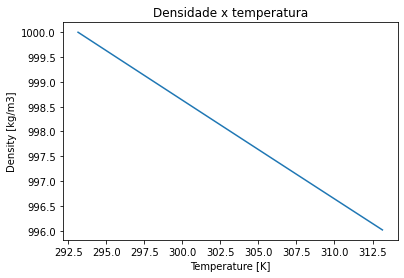

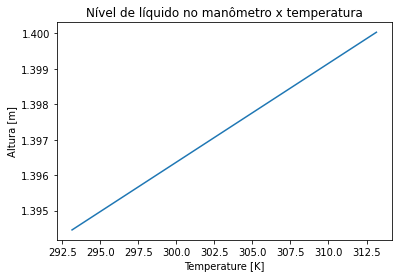

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Variáveis
p1 = 1.15*10**5; 			  #pressão medida[N/m**2]
p2 = 1.01325*10**5; 		#pressão atmosférica[N/m**2]
rho_h2o = 1*10**3; 			#massa específica do fluido
g = 9.8067              #aceleração da gravidade
beta = 0.0002
To = 293.15
r=np.zeros(10)
hz = np.zeros(10)
# Cálculos
# Para encontrar a altura manométrica do fluido
dp = p1-p2; 	     	    	#diferença de pressão
Tin = np.linspace(293.15,313.15,10)
i = 0
for T in Tin: # loop da temperatura 
  rho = rho_h2o / (1.0 + beta*(T-To)) # densidade em função da temperatura
  r[i]=rho # armazenando os valores da densidade
  h = dp/(rho*g); 		    	#nível de líquido no manômetro
  hz[i]=h # armazenando os valores do nível
  i=i+1 # atualizando o índice do loop

# Resultados
fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
print ('Variação de densidade com temperatura é %f m'%h)
ax.plot(Tin,r)
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Density [kg/m3]')
ax.set_title('Densidade x temperatura')

ax1.plot(Tin,hz)
ax1.set_xlabel('Temperature [K]')
ax1.set_ylabel('Altura [m]')
ax1.set_title('Nível de líquido no manômetro x temperatura')
plt.show()


**Exemplo 3**: **Energia potencial e energia cinética**

Sabemos que a variação de energia cinética de um corpo de massa "m" constante é $\Delta E_{c}=m\cdot{\Delta v^2}/2$ e que a variação da energia potencial é $\Delta E_{p}=mg{\Delta \ell}$. Calcule a energia cinética de um corpo de massa $m=5 kg$, a uma velocidade de $30 m/s$ e energia potencial de $1,3\cdot10^3 J$. Considere que a aceleração da gravidade é $9,8067 m/s^2$.  

In [2]:
# Variáveis
EP = 1.3*10**3; 	#Energia potencial[J]
m = 5; 			#massa em kg
v = 50; 			# velocidade em m/s
g = 9.8067 # aceleração da gravidade

# Cálculos
h = EP/(m*g);			# altura em relação a uma referial fixo com z=0
#Calculando a energia cinética
EC = 0.5*m*(v**2);			# Energia cinética em [J]

# Resultados
print ('Altura do corpo é %f m'%h)
print ('\nEnergia cinética é %4.3e J'%EC)

Altura do corpo é 26.512486 m

Energia cinética é 6.250e+03 J


## 2.2.3 Mass Balance for Tank with Constant Cross-Sectional Area

For a tank with constant cross-sectional area, such as a cylindrical or rectangular tank, the liquid height is described by a differential equation

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

where $q_{out}$ is a function of liquid height. Torricelli's law tells the outlet flow from the tank is proportional to square root of the liquid height

$$ q_{out}(h) = C_v\sqrt{h} $$

Dividing by area we obtain a nonlinear ordinary differential equation 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$

in our standard form where the LHS derivative appears with a constant coefficient of 1.

## 2.2.4 Step-by-Step Approach to Nonlinear Simulation

### 2.2.4.1 Step 1. Initialize Jupyter and Python

The first step in any Python application is to initialize graphics display (if you will be creating graphic output), and import any needed libraries.  

The `%matplotlib inline` is a command telling the Jupyter notebook to display any graphics inside this notebook.

We then import a standard graphics library (`matplotlib.pyplot`) that will be referred to with the prefix `plt`, a standard numerical library `numpy` that will be referred to with the prefix `np`, and the function `odeint` from the `scipy.integrate` library.  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### 2.2.4.2 Step 2. Define parameters

Provide values for all relevant parameters.  Use comments to describe the parameters and units.

In [ ]:
Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

### 2.2.4.3 Step 3. Write Functions for the RHS of the Differential Equations

In [ ]:
# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

### 2.2.4.4 Step 4. Choose an Initial Condition, a Time Grid, and Integrate the Differential Equation

In [ ]:
IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t)

### 2.2.4.5 Step 5. Visualize and Analyze Results

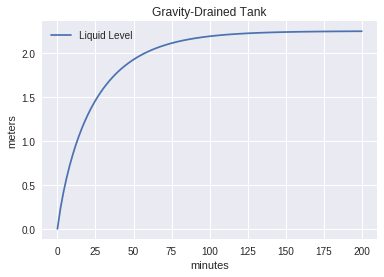

In [ ]:
plt.plot(t,h)

plt.xlabel('minutes')
plt.ylabel('meters')
plt.title('Gravity-Drained Tank')
plt.legend(['Liquid Level']);

### 2.2.4.6 Step 6.  Adjust and Repeat as Needed

Rarely does a simulation provide you with the information you seek on the first try.  You will almost certainly need to revise parameter values, choose different time grids, and add visualization features to obtain the most informative results.

<!--NAVIGATION-->
< [2.1 Process Variables](https://jckantor.github.io/CBE30338/02.01-Process-Variables.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [2.3 Blending Tank Simulation](https://jckantor.github.io/CBE30338/02.03-Blending-Tank-Simulation.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE30338/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>